#DECISION TREE AND RANDOM FOREST PROJECT

#Loan Default Prediction with Decision Trees and Random Forest

I will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor, i would want to invest in people who showed a profile of having a high probability of paying you back. I will try to create a model that will help predict this.

I will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

#COLUMN INFORMATION

Here are what the columns represent:
1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2. purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational","major_purchase","small_business", and "all_other").
3. int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
4. installment: The monthly installments owed by the borrower if the loan is funded.
5. log.annual.inc: The natural log of the self-reported annual income of the borrower.
6. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7. fico: The FICO credit score of the borrower.
8. days.with.cr.line: The number of days the borrower has had a credit line.
9. revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10. revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11. inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
12. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13. pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

#IMPORT LIBRARIES

In [189]:
#Import Numpy and Pandas
import numpy as np
import pandas as pd

In [191]:
#Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#GET THE DATA

In [194]:
#Read data in df
df = pd.read_csv('loan_data.csv')

In [196]:
#Head method on df
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [198]:
#Info method on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [200]:
#Describe method on df
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#EXPLORATORY DATA ANALYSIS

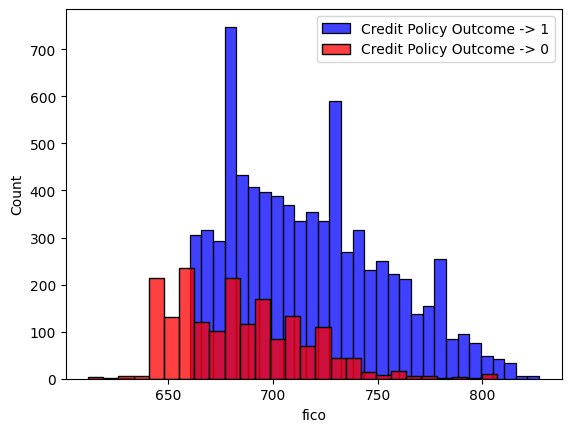

In [203]:
#Histogram of two FICO distributions on top of each other, one for each credit.policy outcome.
sns.histplot(x='fico',data=df[df['credit.policy']==1],label='Credit Policy Outcome -> 1',color='blue')

sns.histplot(x='fico',data=df[df['credit.policy']==0],label='Credit Policy Outcome -> 0',color='red')
plt.legend()

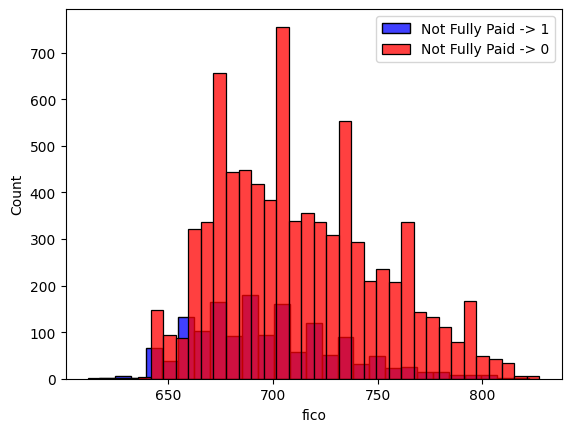

In [205]:
#Histogram of two FICO distributions on top of each other, one for each not fully paid value.
sns.histplot(x='fico',data=df[df['not.fully.paid']==1],label='Not Fully Paid -> 1',color='blue')
sns.histplot(x='fico',data=df[df['not.fully.paid']==0],label='Not Fully Paid -> 0',color='red')
plt.legend()

<Axes: xlabel='purpose', ylabel='count'>

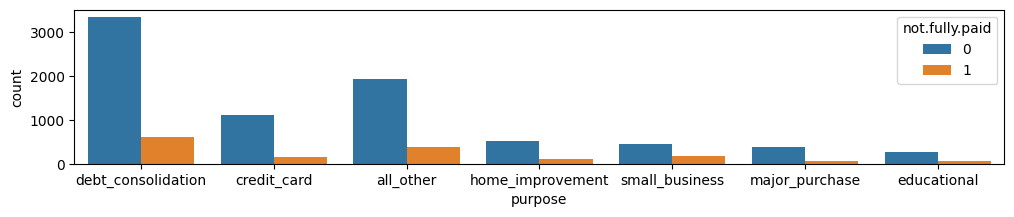

In [207]:
#Countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.
plt.figure(figsize=(12,2))
sns.countplot(data=df,x='purpose',hue='not.fully.paid')

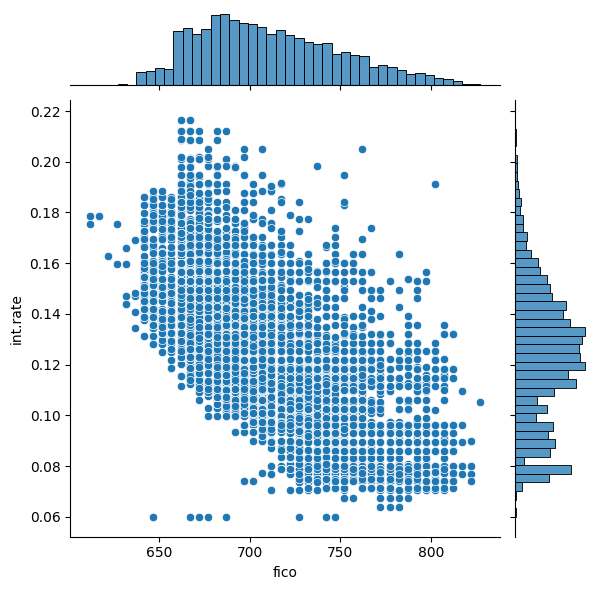

In [209]:
#Trend between FICO score and interest rate.
sns.jointplot(x='fico',y='int.rate',data=df)

In [211]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


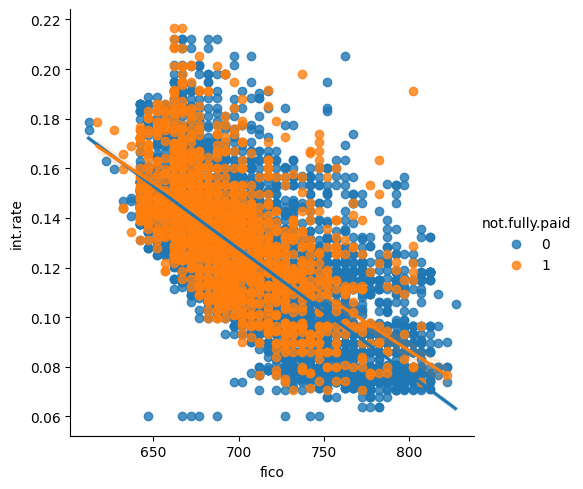

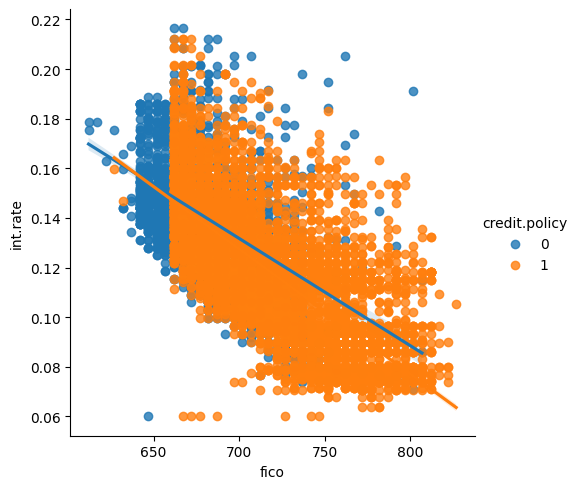

In [213]:
#Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy.
sns.lmplot(y='int.rate',x='fico',hue='not.fully.paid',data=df)
sns.lmplot(y='int.rate',x='fico',hue='credit.policy',data=df)

#SETTING UP THE DATA

#CATEGORICAL FEATURES

In [217]:
#Convert Purpose Column to dummy variables

In [219]:
purpose_dummies=pd.get_dummies(df['purpose'],drop_first=True)
df = pd.concat([df,purpose_dummies],axis=1)

In [221]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [223]:
def convat(n):
    if(n):
        return 1
    else:
        return 0

In [225]:
df['CREDIT CARD']=df['credit_card'].apply(convat)

In [227]:
df.drop('credit_card',axis=1,inplace=True)

In [229]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,debt_consolidation,educational,home_improvement,major_purchase,small_business,CREDIT CARD
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,True,False,False,False,False,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,False,False,False,False,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,True,False,False,False,False,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,True,False,False,False,False,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,False,False,False,False,1


In [231]:
df['Debt Consolidation']=df['debt_consolidation'].apply(convat)
df.drop('debt_consolidation',axis=1,inplace=True)

In [233]:
df['HOME IMPROVEMENT']=df['home_improvement'].apply(convat)
df.drop('home_improvement',axis=1,inplace=True)

In [235]:
df['Educational']=df['educational'].apply(convat)
df.drop('educational',axis=1,inplace=True)
df['Major Purchase']=df['major_purchase'].apply(convat)
df.drop('major_purchase',axis=1,inplace=True)

In [237]:
df['SMALL BUSINESS']=df['small_business'].apply(convat)
df.drop('small_business',axis=1,inplace=True)
df.drop('purpose',axis=1,inplace=True)

In [239]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,CREDIT CARD,Debt Consolidation,HOME IMPROVEMENT,Educational,Major Purchase,SMALL BUSINESS
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


#TRAIN TEST SPLIT

In [242]:
#X will be all columns except not.fully.paid
#y will be not.fully.paid

In [244]:
x=df.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']

In [246]:
x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,CREDIT CARD,Debt Consolidation,HOME IMPROVEMENT,Educational,Major Purchase,SMALL BUSINESS
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,1,0,0,0


In [248]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [250]:
# Importing the train_test_split function
# Splitting the dataset into training (67%) and testing (33%) sets, ensuring reproducibility with random_state=42
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [252]:
x_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,CREDIT CARD,Debt Consolidation,HOME IMPROVEMENT,Educational,Major Purchase,SMALL BUSINESS
5314,1,0.1114,262.43,12.072541,15.13,722,9630.000000,38107,69.9,0,0,0,0,1,0,0,0,0
1831,1,0.1221,433.10,10.971641,16.04,707,3885.041667,12671,60.6,1,0,0,1,0,0,0,0,0
7267,1,0.1099,180.05,11.002100,17.42,697,5700.041667,723,16.4,0,3,0,0,0,0,0,0,0
3720,1,0.1126,821.59,12.487485,5.53,787,10860.000000,3131,8.9,2,0,0,0,0,1,0,0,0
7319,1,0.0714,111.39,11.034890,16.51,732,4290.041667,22646,65.3,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,0.1357,169.85,10.422281,10.71,677,5190.041667,179,44.7,2,1,0,0,1,0,0,0,0
5191,1,0.1426,806.19,11.066638,24.88,702,10409.958330,30803,84.4,1,0,0,0,1,0,0,0,0
5390,1,0.1426,720.43,11.018629,18.85,692,5459.958333,18020,34.9,0,0,0,0,1,0,0,0,0
860,1,0.1166,247.90,11.002100,19.22,687,4530.000000,17745,92.4,1,0,0,0,1,0,0,0,0


In [254]:
x_test

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,CREDIT CARD,Debt Consolidation,HOME IMPROVEMENT,Educational,Major Purchase,SMALL BUSINESS
8558,0,0.1545,453.52,10.596635,14.52,657,3810.000000,8545,82.2,3,0,0,0,1,0,0,0,0
4629,1,0.1183,533.46,11.156251,10.89,732,3600.000000,15942,40.9,3,0,0,0,1,0,0,0,0
1383,1,0.1146,197.75,10.348173,13.73,692,2069.958333,14154,85.8,0,0,0,1,0,0,0,0,0
8142,0,0.1646,106.16,11.002100,28.16,672,6480.041667,7846,25.8,4,1,0,0,0,0,0,0,0
1768,1,0.1221,159.92,11.127322,3.99,702,5040.000000,468,7.2,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,1,0.1355,203.76,11.184421,23.37,682,6599.000000,19826,39.0,2,0,0,0,0,0,0,0,0
3518,1,0.0932,159.74,9.825526,19.14,752,8640.000000,11096,10.4,0,1,0,0,0,0,1,0,0
3526,1,0.0932,383.37,10.819778,6.84,777,7230.000000,26050,26.1,0,0,0,1,0,0,0,0,0
1174,1,0.1008,96.92,10.491274,6.90,697,2339.958333,8349,43.5,0,0,0,0,0,0,1,0,0


In [258]:
y_train

5314    0
1831    0
7267    0
3720    0
7319    0
       ..
5734    0
5191    0
5390    0
860     0
7270    0
Name: not.fully.paid, Length: 6417, dtype: int64

In [261]:
y_test

8558    0
4629    0
1383    1
8142    0
1768    0
       ..
734     0
3518    0
3526    0
1174    1
8336    1
Name: not.fully.paid, Length: 3161, dtype: int64

#TRAINING A DECISION TREE MODEL

In [264]:
# Importing the DecisionTreeClassifier for building a decision tree model
from sklearn.tree import DecisionTreeClassifier

In [266]:
# Creating an instance of the DecisionTreeClassifier model
model = DecisionTreeClassifier()
# Creating an instance of the DecisionTreeClassifier model
model.fit(x_train,y_train)

DecisionTreeClassifier()

#Predictions and Evaluation of Decision Tree

In [269]:
# Making predictions on the test data using the trained model
predictions = model.predict(x_test)

In [271]:
# Importing classification_report and confusion_matrix to evaluate the model's performance
from sklearn.metrics import classification_report,confusion_matrix

In [275]:
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2650
           1       0.21      0.23      0.22       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.74      0.74      3161



[[2215  435]
 [ 395  116]]


#TRAINING THE RANDOM FOREST MODEL

In [283]:
#Importing the RandomForestClassifier to build a random forest model
from sklearn.ensemble import RandomForestClassifier

In [287]:
# Creating an instance of RandomForestClassifier with 600 decision trees (estimators)

In [289]:
rfc = RandomForestClassifier(n_estimators=600)

In [291]:
#Training the Random Forest model using the training data (x_train and y_train)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=600)

#Predictions and Evaluation FOR RANDOM FOREST MODEL

In [294]:
# Making predictions on the test data using the trained Random Forest model
pred_i = rfc.predict(x_test)

In [296]:
print(classification_report(y_test,pred_i))
print('\n')
print(confusion_matrix(y_test,pred_i))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2650
           1       0.44      0.02      0.03       511

    accuracy                           0.84      3161
   macro avg       0.64      0.51      0.47      3161
weighted avg       0.78      0.84      0.77      3161



[[2640   10]
 [ 503    8]]


In [298]:
# Depends what metric you are trying to optimize for. 
# Notice the recall for each class for the models.
# Neither did very well, more feature engineering is needed.

In [300]:
#CONCLUSION -> RANDOM FOREST VS DECISON TREE

#END OF NOTEBOOK

#CREATED BY SHAURYA MITTAL